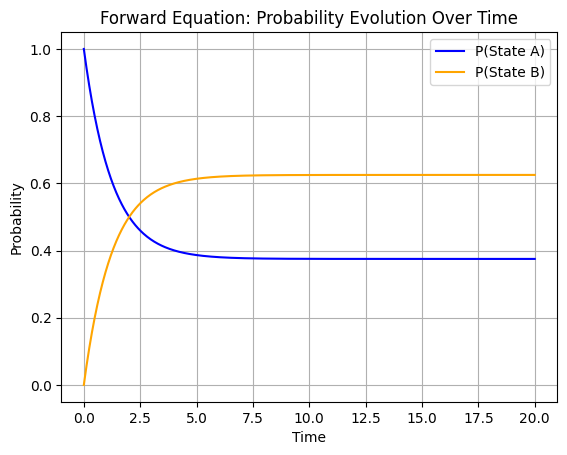

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Transition rate matrix
Q = np.array([[-0.5, 0.5],
              [0.3, -0.3]])

# Initial probabilities (starting in state A)
P0 = np.array([1.0, 0.0])  # Starts in state A with probability 1

# Time points where we want to evaluate the solution
time = np.linspace(0, 20, 500)

# Define the forward equation


def forward_equation(P, t, Q):
    return np.dot(Q.T, P)


# Solve the forward equation using odeint
P_solution = odeint(forward_equation, P0, time, args=(Q,))

# Plot the results
plt.plot(time, P_solution[:, 0], label="P(State A)", color="blue")
plt.plot(time, P_solution[:, 1], label="P(State B)", color="orange")
plt.title("Forward Equation: Probability Evolution Over Time")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np

# Hidden Markov Model Parameters
states = ['Rainy', 'Sunny']
observations = ['Walk', 'Shop', 'Clean']
start_probability = np.array([0.6, 0.4])  # Initial state probabilities

# Transition matrix (Rainy -> Rainy, Rainy -> Sunny, etc.)
transition_probability = np.array([[0.7, 0.3],
                                   [0.4, 0.6]])

# Emission matrix (Probabilities of seeing 'Walk', 'Shop', 'Clean' in each state)
emission_probability = np.array([[0.1, 0.4, 0.5],
                                 [0.6, 0.3, 0.1]])

# Observation sequence
obs_seq = [0, 1, 2]  # Walk, Shop, Clean

# Forward algorithm


def forward_algorithm(obs_seq, start_prob, trans_prob, emis_prob):
    T = len(obs_seq)
    N = len(start_prob)
    alpha = np.zeros((T, N))
    alpha[0, :] = start_prob * emis_prob[:, obs_seq[0]]

    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(
                alpha[t - 1] * trans_prob[:, j]) * emis_prob[j, obs_seq[t]]

    return alpha

# Backward algorithm


def backward_algorithm(obs_seq, trans_prob, emis_prob):
    T = len(obs_seq)
    N = len(trans_prob)
    beta = np.zeros((T, N))
    beta[T - 1, :] = 1

    for t in range(T - 2, -1, -1):
        for i in range(N):
            beta[t, i] = np.sum(trans_prob[i, :] *
                                emis_prob[:, obs_seq[t + 1]] * beta[t + 1])

    return beta


# Calculate forward and backward probabilities
alpha = forward_algorithm(obs_seq, start_probability,
                          transition_probability, emission_probability)
beta = backward_algorithm(
    obs_seq, transition_probability, emission_probability)

# Total probability of the observation sequence
prob_obs_seq = np.sum(alpha[-1, :])

print("Forward Probabilities:\n", alpha)
print("Backward Probabilities:\n", beta)
print("Probability of the observation sequence:", prob_obs_seq)

Forward Probabilities:
 [[0.06     0.24    ]
 [0.0552   0.0486  ]
 [0.02904  0.004572]]
Backward Probabilities:
 [[0.1298 0.1076]
 [0.38   0.26  ]
 [1.     1.    ]]
Probability of the observation sequence: 0.033612
